# **MARKET SEGMENTATION ANALYSIS**
### MCDONALD CASE STUDY

# **IMPORTING LIBRARIES**

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import adjusted_rand_score
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# **LOAD DATASET**

In [2]:
mcdonalds = pd.read_csv("mcdonalds.csv")

In [5]:
#Display first 5 rows
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [6]:
# Get the shape of the dataset (rows, columns)
mcdonalds.shape

(1453, 15)

**Demographic segmentation using 'Age' & 'Gender'**

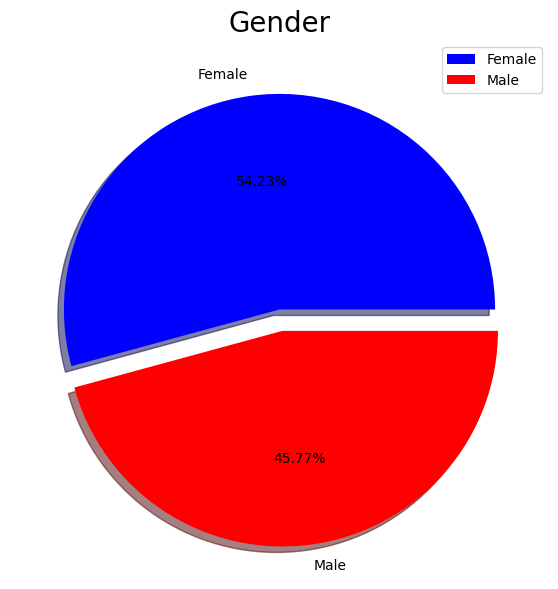

In [28]:
# Gender: we infer that there are more female customers than male

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(mcdonalds['Gender'].value_counts(), colors = ['blue', 'red'], explode = [0, 0.1], labels = ['Female', 'Male'], shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()


<ipython-input-30-07efce8c17cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  data = sns.countplot(x=mcdonalds['Age'], palette = 'rainbow')


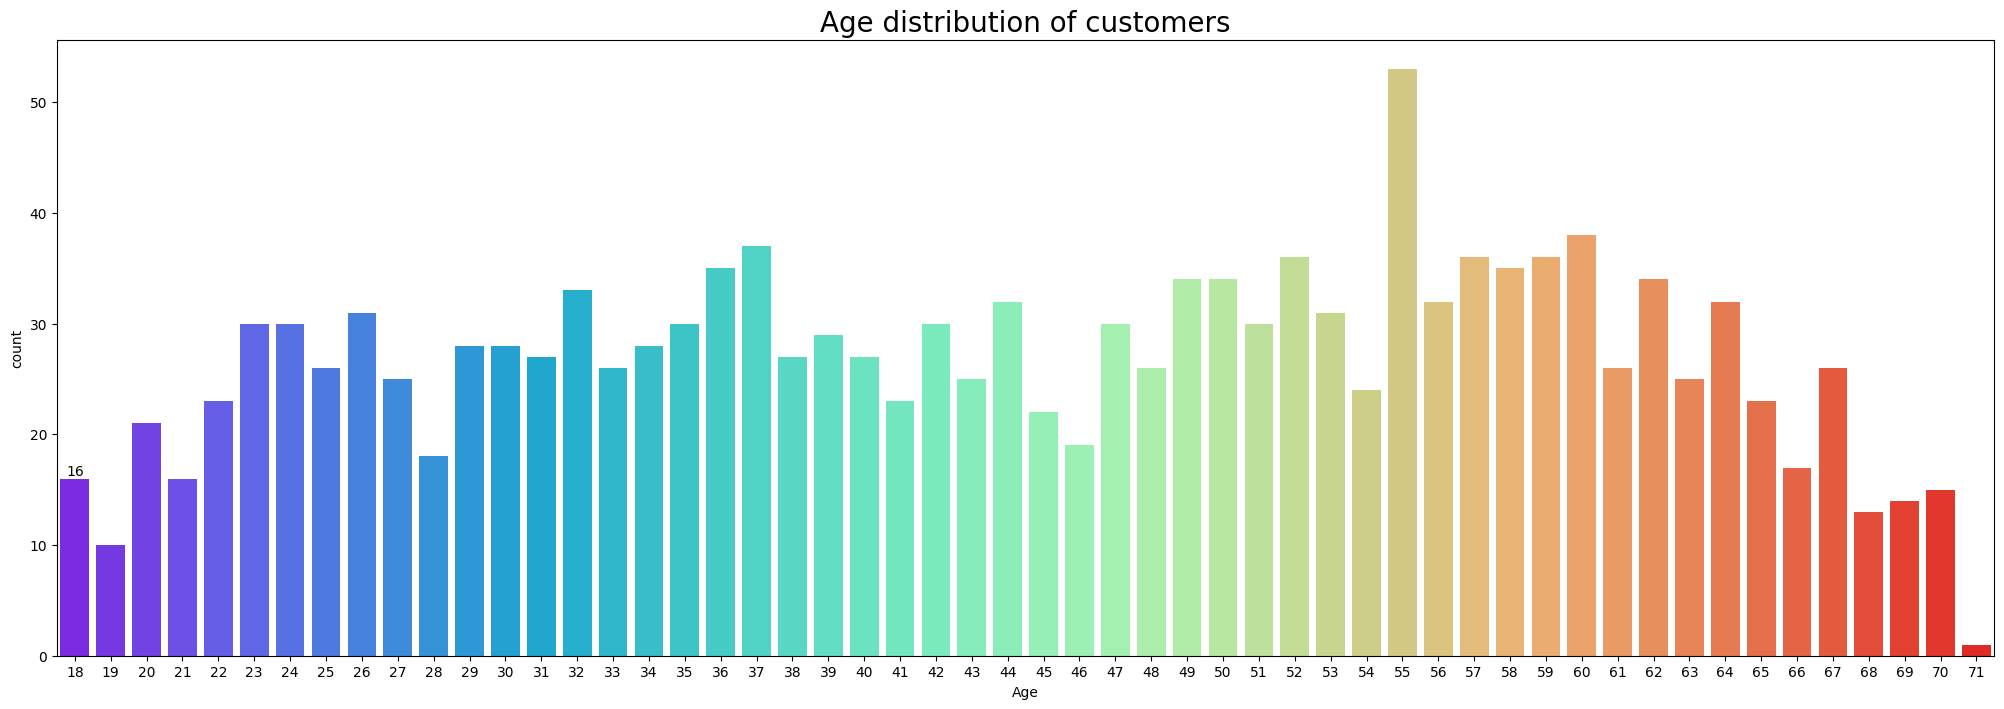

In [30]:
# Age: Mcdonalds recieve more customers of age between 50-60 and 35-40
plt.rcParams['figure.figsize'] = (25, 8)
data = sns.countplot(x=mcdonalds['Age'], palette = 'rainbow')
data.bar_label(data.containers[0])
plt.title('Age distribution of customers', fontsize = 20)
plt.show()

**Pyschographic segmentation using 'Like'**

<ipython-input-33-96c564597ab0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=mcdonalds, x="Like", y="Age", orient="v", height=5, aspect=2, palette="Set1",kind="swarm")


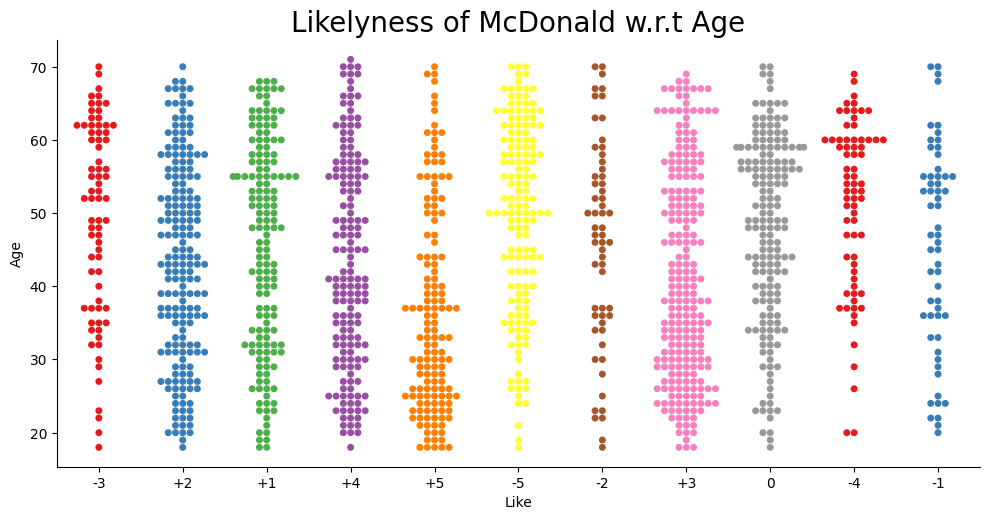

In [33]:
# renaming the category for convinence
mcdonalds['Like'] = mcdonalds['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

# plotting the results
sns.catplot(data=mcdonalds, x="Like", y="Age", orient="v", height=5, aspect=2, palette="Set1",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age', fontsize=20)
plt.show()

# **DATA PREPARATION**

In [7]:
# Select the first 11 columns and convert to a numpy array
MD_x = mcdonalds.iloc[:, :11].values

# Convert 'Yes' to 1 and 'No' to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate the mean of each column and round to 2 decimal places
col_means = np.round(np.mean(MD_x, axis=0), 2)

print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


**Principal Component Analysis (PCA)**

In [10]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Summary of PCA
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

print("Proportion of Variance:", explained_variance)
print("Cumulative Proportion:", cumulative_explained_variance)

Proportion of Variance: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative Proportion: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


**Visualizing PCA Results**

In [11]:
np.set_printoptions(precision=1, suppress=True)

# Print the PCA results
print(MD_pca)

[[ 0.4 -0.2  0.7 ...  0.2  0.5 -0.6]
 [-0.2  0.4 -0.7 ...  0.1  0.5 -0.5]
 [ 0.4  0.7 -0.1 ... -0.3  0.1  0.2]
 ...
 [-0.2  1.1  0.2 ...  0.   0.1 -0. ]
 [-1.2 -0.   0.6 ...  0.  -0.  -0.1]
 [ 1.6  0.3 -0.  ... -0.1 -0.4 -0.5]]


In [34]:
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = MD_pca, columns = names)
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


**Plotting PCA Results**

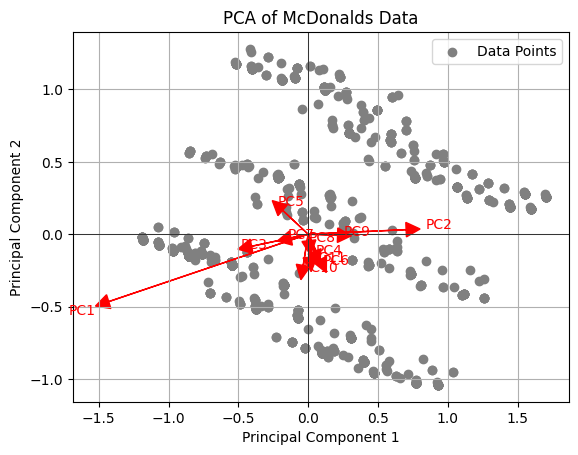

In [12]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', label='Data Points')

for i, (component, variance) in enumerate(zip(pca.components_, pca.explained_variance_ratio_)):
    plt.arrow(0, 0, component[0]*variance*10, component[1]*variance*10,
              head_width=0.1, head_length=0.1, fc='red', ec='red')
    plt.text(component[0]*variance*10*1.2, component[1]*variance*10*1.2, f'PC{i+1}', color='red')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of McDonalds Data')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

# **K-Means Clustering**

In [16]:
np.random.seed(1234)

def run_kmeans(data, num_clusters, num_reps):
    best_kmeans = None
    best_inertia = np.inf

    for _ in range(num_reps):
        kmeans = KMeans(n_clusters=num_clusters, n_init=1, random_state=None)
        kmeans.fit(data)
        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
            best_kmeans = kmeans

    return best_kmeans

In [17]:
# Perform k-means clustering for 2 to 8 clusters
kmeans_results = {}
for k in range(2, 9):
    kmeans = run_kmeans(MD_x, k, 10)
    kmeans_results[k] = kmeans



In [18]:
# Relabel clusters
def relabel_clusters(kmeans):
    new_labels = np.zeros_like(kmeans.labels_)
    centroids = kmeans.cluster_centers_
    for i in range(centroids.shape[0]):
        mask = (kmeans.labels_ == i)
        new_labels[mask] = i
    return new_labels

In [19]:
# Relabel clusters for each k
relabelled_results = {k: relabel_clusters(kmeans) for k, kmeans in kmeans_results.items()}

In [20]:
# To access the result for a specific number of clusters, e.g., k=2:
MD_km28 = relabelled_results[2]
print(MD_km28)

[1 0 0 ... 0 0 1]


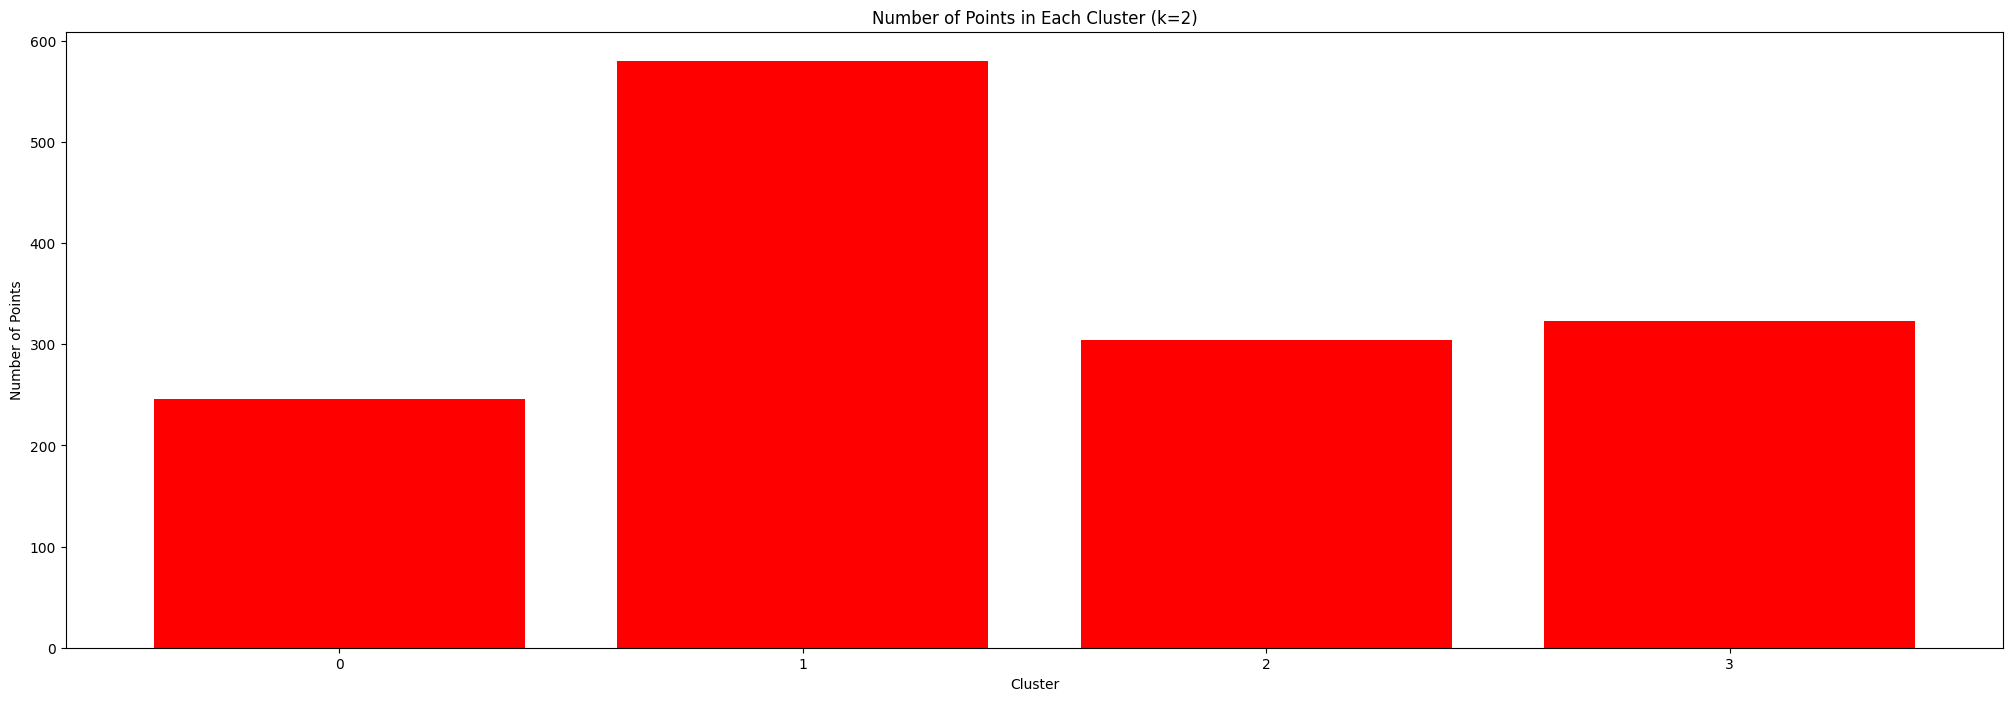

In [45]:
relabelled_results = {k: relabel_clusters(kmeans) for k, kmeans in kmeans_results.items()}

# To access the result for a specific number of clusters, e.g., k=2:
MD_km28 = relabelled_results[4]

# Plot the number of points in each cluster
unique, counts = np.unique(MD_km28, return_counts=True)
plt.bar(unique, counts, color=['red'])
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('Number of Points in Each Cluster (k=2)')
plt.xticks(unique)  # Ensure all clusters are represented on the x-axis
plt.show()

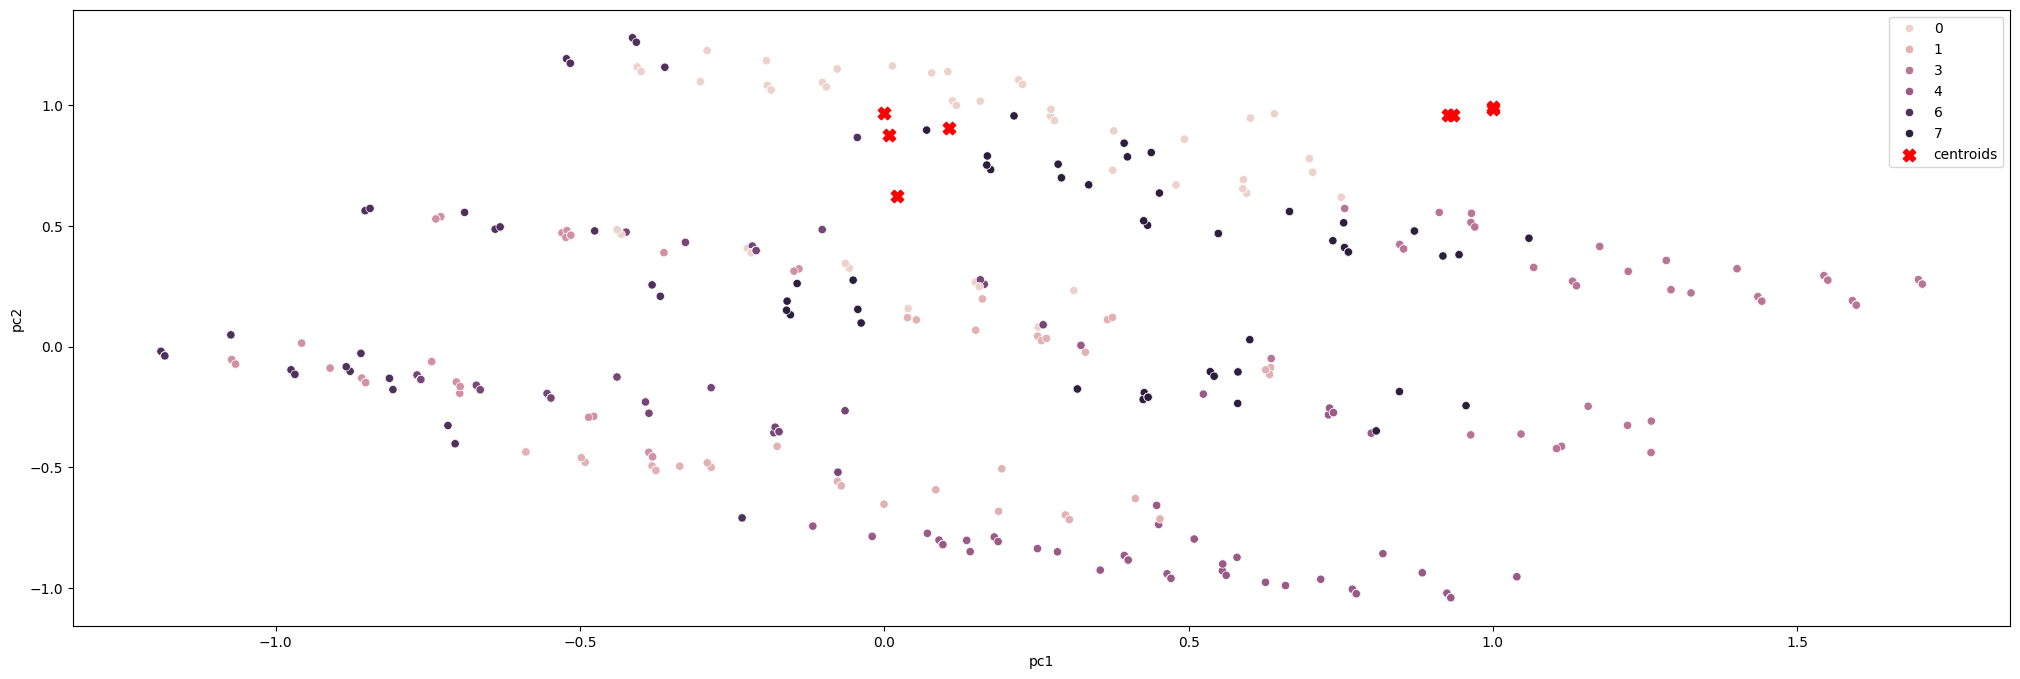

In [46]:
# cluster visualization
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

# **Describing Segments**

In [54]:
mcdonalds['cluster_num'] = kmeans.labels_ #adding to df
crosstab = pd.crosstab(mcdonalds['cluster_num'], mcdonalds['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab


Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,2,5,5,3,24,28,47,58,36,34
1,5,5,7,5,11,29,31,17,4,2,0
2,1,2,0,1,3,17,23,31,69,46,37
3,78,25,22,13,9,25,5,4,4,0,0
4,52,34,29,22,17,34,16,24,8,1,0
5,1,1,1,4,7,14,24,39,46,41,35
6,0,0,0,0,1,5,6,15,29,29,36
7,10,2,9,9,7,21,19,10,11,5,1


**Plotting mosaic plot**

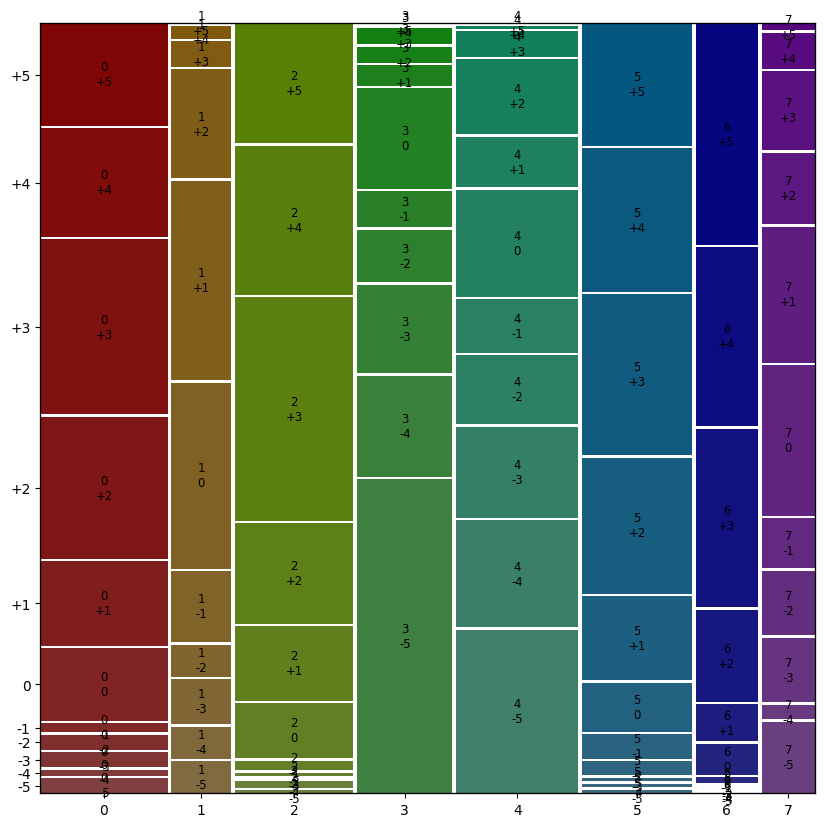

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,2,5,5,3,24,28,47,58,36,34
1,5,5,7,5,11,29,31,17,4,2,0
2,1,2,0,1,3,17,23,31,69,46,37
3,78,25,22,13,9,25,5,4,4,0,0
4,52,34,29,22,17,34,16,24,8,1,0
5,1,1,1,4,7,14,24,39,46,41,35
6,0,0,0,0,1,5,6,15,29,29,36
7,10,2,9,9,7,21,19,10,11,5,1


None

In [57]:
plt.rcParams['figure.figsize'] = (10,10)
mosaic(crosstab.stack())
display(crosstab, plt.show())

In [59]:
# crosstab creation
crosstab_gender = pd.crosstab(mcdonalds['cluster_num'],mcdonalds['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,124,123
1,65,51
2,145,85
3,77,108
4,142,95
5,125,88
6,66,55
7,44,60


**Plotting mosaic plot**

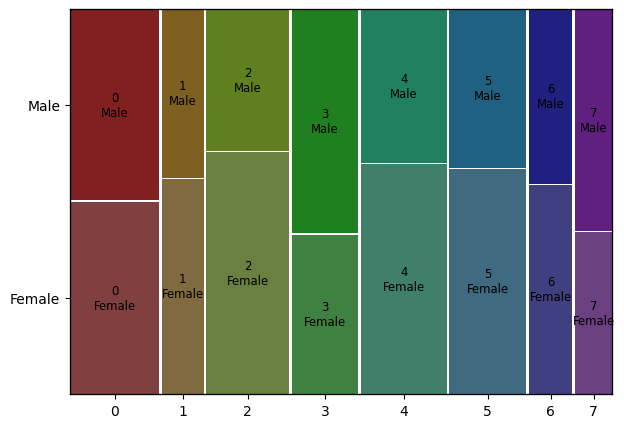

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,2,5,5,3,24,28,47,58,36,34
1,5,5,7,5,11,29,31,17,4,2,0
2,1,2,0,1,3,17,23,31,69,46,37
3,78,25,22,13,9,25,5,4,4,0,0
4,52,34,29,22,17,34,16,24,8,1,0
5,1,1,1,4,7,14,24,39,46,41,35
6,0,0,0,0,1,5,6,15,29,29,36
7,10,2,9,9,7,21,19,10,11,5,1


None

In [60]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
display(crosstab, plt.show())

**Box plot for 'Age'**

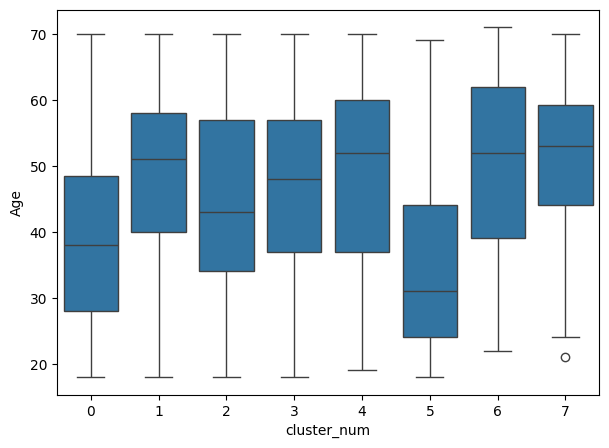

In [61]:
sns.boxplot(x="cluster_num", y="Age", data=mcdonalds);

# **Selecting the Target Segment**

In [64]:
# calculating the mean of 'VisitFrequency'
mcdonalds['VisitFrequency'] = LabelEncoder().fit_transform(mcdonalds['VisitFrequency'])
visit = mcdonalds.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.591093
1,1,2.560345
2,2,2.573913
3,3,2.713514
4,4,2.864979
5,5,2.638498
6,6,2.537190
7,7,2.442308


In [65]:
# calculating the mean of 'Like'
mcdonalds['Like'] = LabelEncoder().fit_transform(mcdonalds['Like'])
Like = mcdonalds.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.190283
1,1,4.655172
2,2,2.917391
3,3,7.789189
4,4,6.510549
5,5,2.896714
6,6,2.966942
7,7,4.990385


In [66]:
# calculating the mean of 'Gender'
mcdonalds['Gender'] = LabelEncoder().fit_transform(mcdonalds['Gender'])
Gender = mcdonalds.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.497976
1,1,0.439655
2,2,0.369565
3,3,0.583784
4,4,0.400844
5,5,0.413146
6,6,0.454545
7,7,0.576923


In [67]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.497976,3.190283,2.591093
1,1,0.439655,4.655172,2.560345
2,2,0.369565,2.917391,2.573913
3,3,0.583784,7.789189,2.713514
4,4,0.400844,6.510549,2.864979
5,5,0.413146,2.896714,2.638498
6,6,0.454545,2.966942,2.537190
7,7,0.576923,4.990385,2.442308


**Simple segment evaluation plot for the fast food data set**

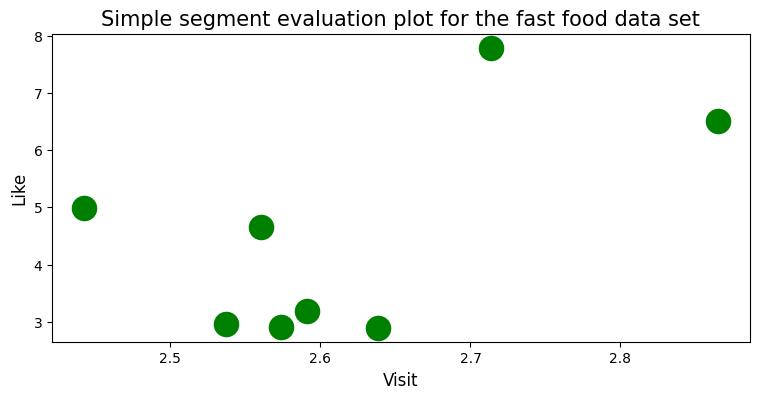

In [69]:
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="g")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()